# <p style="text-align: center;">APPLE DATASET</p>

### IMPORTING LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
import string
import csv
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from collections import Counter
from sklearn import metrics

warnings.filterwarnings("ignore")

### LOADING CSV

In [2]:
Data = pd.read_csv("Apple.csv")
print(Data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

### DATA PREPROCESSING

In [3]:
# Finding size of dataset (i.e number of rows & columns of the dataset.)
print("Rows: ",Data.shape[0])
print("Columns: ",Data.shape[1])

Rows:  10468
Columns:  7


In [4]:
Data.head() # head() function by default showcases first five rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [5]:
Data.shape

(10468, 7)

In [6]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


Different Data Types In Datasets:

In [7]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
Data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [10]:
# Finding Number of samples under target variable
print(f"Number of samples under target value: \n{Data['Volume'].value_counts()}")
sns.countplot(Data.Volume).set_ylim(0, 2)
plt.show()

Number of samples under target value: 
246400000    7
239680000    6
244160000    6
302400000    5
255360000    5
            ..
260915200    1
244652800    1
209171200    1
119470400    1
134118500    1
Name: Volume, Length: 9905, dtype: int64


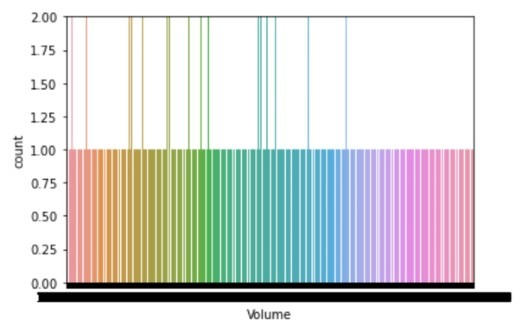

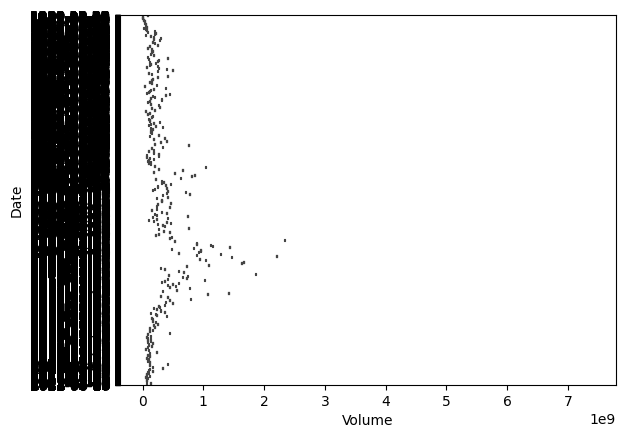

In [11]:
sns.boxplot(x = "Volume", y = "Date", data = Data)
plt.show()

The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model.

<AxesSubplot: >

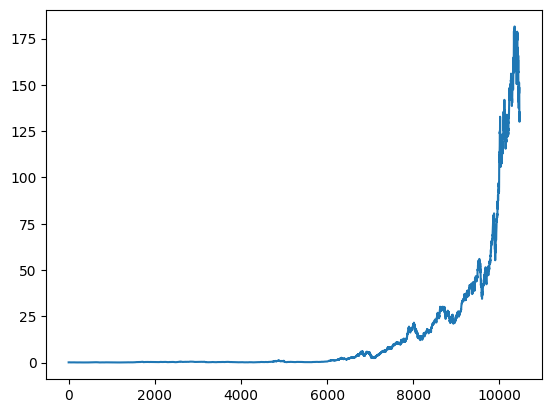

In [12]:
# Plot the True Adj Close Value
Data['Adj Close'].plot()

### IMPUNING VALUES

In [13]:
Data.isnull().values.any()  # Checking whether we have any missing values in dataset

False

In [14]:
Data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values in the dataset.

### DATA STANDARDIZATION

In [15]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [16]:
Data['Volume'][:5]

0    469033600
1    175884800
2    105728000
3     86441600
4     73449600
Name: Volume, dtype: int64

In [17]:
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
Data["Volume"] = scalar.fit_transform(Data["Volume"].values.reshape(-1,1))
print ("After Standardisation: ")
Data.head()

After Standardisation: 


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,0.407834
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,-0.457356
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,-0.664415
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,-0.721336
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,-0.759681


### DATA NORMALIZATION

In [18]:
norm = MinMaxScaler()
Data["Volume"] = norm.fit_transform(Data["Volume"].values.reshape(-1,1))
print ("After Normalisation: ")
Data.head()

After Normalisation: 


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,0.063198
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,0.023699
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,0.014246
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,0.011647
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,0.009897


Making data available for various machine learning model through normalization.

#### Discretization

In [19]:
Data['Adj Close'].unique()

array([1.00178000e-01, 9.49520000e-02, 8.79830000e-02, ...,
       1.35429993e+02, 1.30059998e+02, 1.31559998e+02])

In [20]:
print(Data['Adj Close'].max())
print(Data['Adj Close'].min())

181.511703
0.038329


In [21]:
Data['bin_of_Adj Close'] = pd.cut(Data['Adj Close'], [200,300,400,500,600,700],
                                  labels=['200-300', '300-400', '400-500', '500-600', '600-700'])

In [22]:
Data.groupby([Data["bin_of_Adj Close"]]).count()

,Date,Open,High,Low,Close,Adj Close,Volume
bin_of_Adj Close,,,,,,,
200-300,0,0,0,0,0,0,0
300-400,0,0,0,0,0,0,0
400-500,0,0,0,0,0,0,0
500-600,0,0,0,0,0,0,0
600-700,0,0,0,0,0,0,0


In [23]:
for column in Data.columns:
    print("------  " + column + "  ------")
    print(Data[column].value_counts())

------  Date  ------
1980-12-12    1
2008-08-28    1
2008-08-04    1
2008-08-05    1
2008-08-06    1
             ..
1994-10-03    1
1994-10-04    1
1994-10-05    1
1994-10-06    1
2022-06-17    1
Name: Date, Length: 10468, dtype: int64
------  Open  ------
0.354911      38
0.401786      37
0.366071      36
0.397321      34
0.357143      34
              ..
3.477500       1
3.462500       1
3.563571       1
3.557143       1
130.070007     1
Name: Open, Length: 5823, dtype: int64
------  High  ------
0.372768      35
0.375000      34
0.363839      32
0.370536      32
0.361607      31
              ..
5.274643       1
5.389643       1
5.463929       1
5.535357       1
133.080002     1
Name: High, Length: 5760, dtype: int64
------  Low  ------
0.357143      51
0.352679      42
0.366071      38
0.343750      35
0.397321      35
              ..
3.060000       1
3.176786       1
3.126429       1
3.380357       1
129.809998     1
Name: Low, Length: 5738, dtype: int64
------  Close  ------
0.

Making the values group wise and making continuous values as discrete.

### DATA SUMMARIZATION

In [24]:
print(Data.shape)

(10468, 8)


In [25]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000
mean,14.757987,14.921491,14.594484,14.763533,14.130431,0.044579
std,31.914174,32.289158,31.543959,31.929489,31.637275,0.045656
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000
25%,0.283482,0.289286,0.276786,0.283482,0.235462,0.016678
50%,0.474107,0.482768,0.465960,0.475446,0.392373,0.029395
75%,14.953303,15.057143,14.692589,14.901964,12.835269,0.055322
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.000000


### DATA VISUALIZATION

#### Histogram

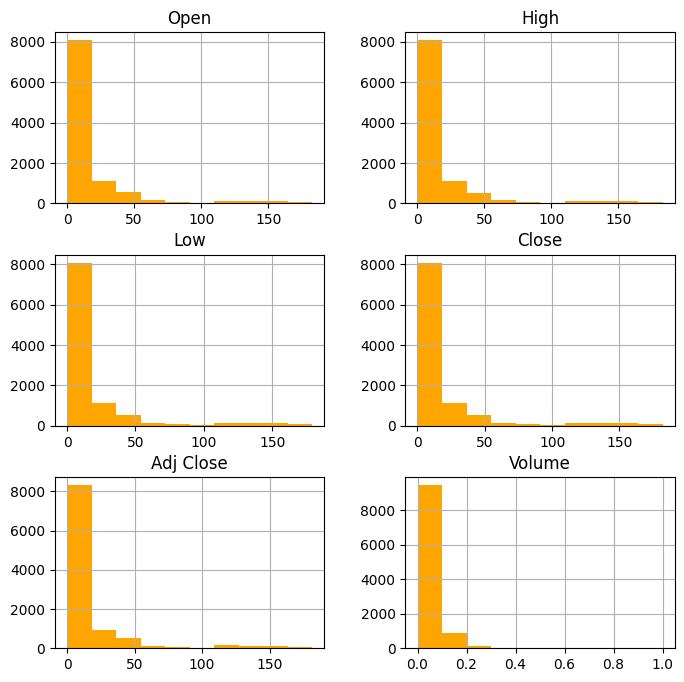

In [26]:
Data.hist(color = "orange", figsize = (8,8))
plt.show()

<AxesSubplot: >

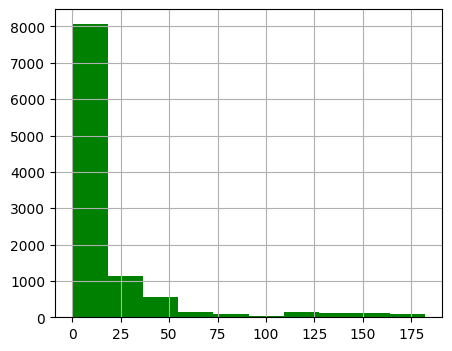

In [27]:
Data['Close'].hist(color = "green", figsize = (5,4))

#### Scatter Plot

<AxesSubplot: >

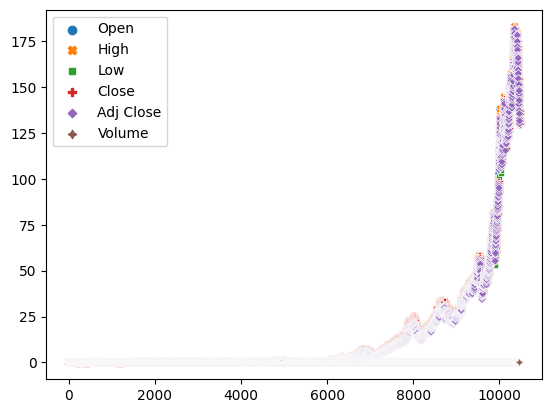

In [28]:
sns.scatterplot(Data)

<AxesSubplot: xlabel='Close', ylabel='Volume'>

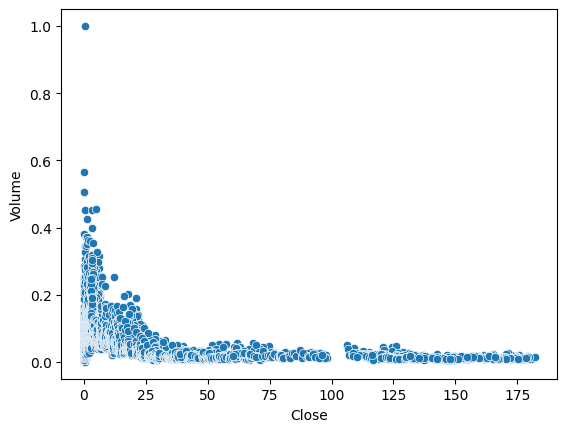

In [29]:
sns.scatterplot(x = Data['Close'], y = Data['Volume'])

#### Boxplot

<AxesSubplot: >

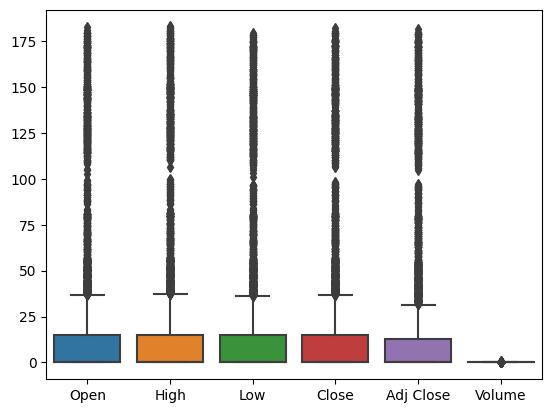

In [30]:
sns.boxplot(Data)

<AxesSubplot: xlabel='Close', ylabel='Volume'>

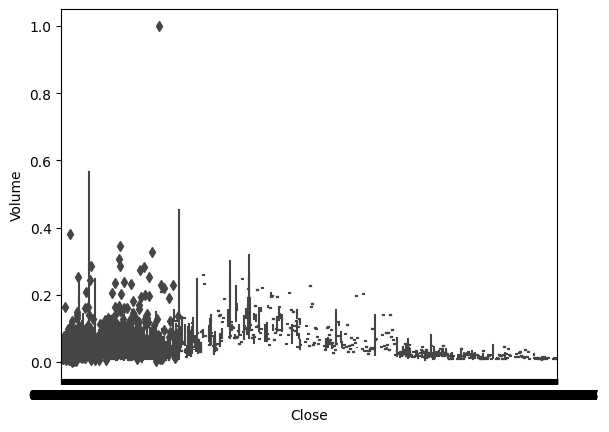

In [31]:
sns.boxplot(x = "Close", y = "Volume", data = Data)

These are the various visualizations of data. Now we can use this data to apply on various models.

## <p style="text-align: center;"> PHASE 2 </p>

### DATA MODELLING
Split your data into training, validation, and testing

In [32]:
X = Data[["Open", "High", "Low", "Volume"]]
y = Data["Close"]

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print("Train Size: " + str(X_train.shape[0]))
print("Test Size: " + str(X_test.shape[0]))
print("Validation Size: " + str(X_val.shape[0]))

Train Size: 6699
Test Size: 2094
Validation Size: 1675


## 1. LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_lr = lr_model.predict(X_test)

lr_score_test = lr_model.score(X_test, y_test)
lr_score_train = lr_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:', lr_score_test)
print('Train Data Acurracy:', lr_score_train)

Test Data Acurracy: 0.9999342182418407
Train Data Acurracy: 0.9999353893860727


#### ACCURACY

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(lr_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.9994320648119583


#### MEAN ABSOLUTE ERROR

In [35]:
from sklearn.metrics import mean_absolute_error
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print('Mean Absolute Error:', lr_mae)

Mean Absolute Error: 0.07816850986439684


## 2. KNN

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN model
knn_model = KNeighborsRegressor(n_neighbors = 5)

# Fit the model to the data
knn_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_knn = knn_model.predict(X_test)

knn_score_test = knn_model.score(X_test, y_test)
knn_score_train = knn_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:', knn_score_test)
print('Train Data Acurracy:', knn_score_train)

Test Data Acurracy: 0.9998921194020267
Train Data Acurracy: 0.9999064522089086


#### ACCURACY

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(knn_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.5429704778350681


#### MEAN ABSOLUTE ERROR

In [38]:
from sklearn.metrics import mean_absolute_error
knn_mae = mean_absolute_error(y_test, y_pred_knn)
print('Mean Absolute Error:', knn_mae)

Mean Absolute Error: 0.10891471929321878


## 3. SUPPORT VECTOR MACHINE

In [39]:
from sklearn.svm import SVR

# Create a SVM regression model
svm_model = SVR(kernel="rbf", C=1.0, epsilon = 0.1)

# Fit the model to the data
svm_model.fit(X_train, y_train)

# Use the model to make predictions
y_pred_svm = svm_model.predict(X_test)

svm_score_test = svm_model.score(X_test, y_test)
svm_score_train = svm_model.score(X_train, y_train)

# Print the evaluation score
print('Test Data Acurracy:',svm_score_test)
print('Train Data Acurracy:',svm_score_train)

Test Data Acurracy: 0.9971173335450411
Train Data Acurracy: 0.9962495093460568


#### ACCURACY

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits = 5)
scores = cross_val_score(svm_model, X, y, cv = kf)
print("Average Accuracy Using KFold:", scores.mean())

Average Accuracy Using KFold: 0.27237926891317005


#### MEAN ABSOLUTE ERROR

In [41]:
from sklearn.metrics import mean_absolute_error
svm_mae = mean_absolute_error(y_test, y_pred_svm)
print('Mean Absolute Error:', svm_mae)

Mean Absolute Error: 0.32294731263018944


### Accuracy vs. Algorithm Plot

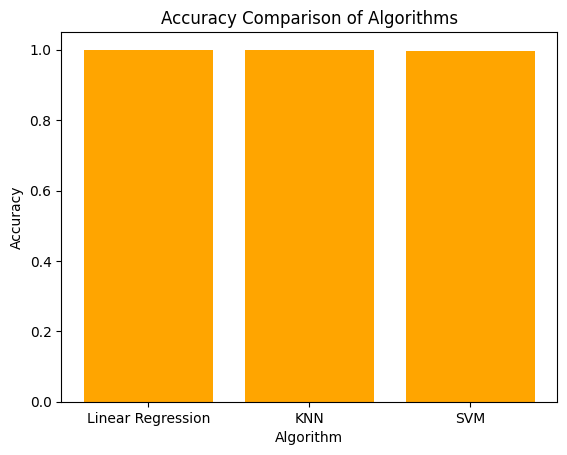

In [42]:
plt.bar(["Linear Regression", "KNN", "SVM"], [lr_score_test, knn_score_test, svm_score_test], color = "orange")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Algorithms")
plt.show()

### MAE vs. Algorithm Plot

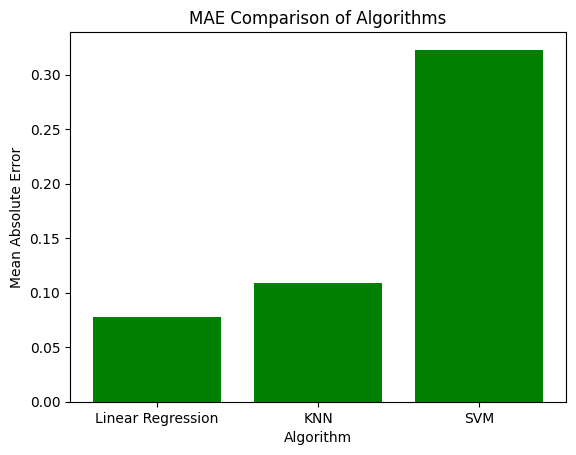

In [43]:
plt.bar(["Linear Regression", "KNN", "SVM"], [lr_mae, knn_mae, svm_mae], color = "green")
plt.xlabel("Algorithm")
plt.ylabel("Mean Absolute Error")
plt.title("MAE Comparison of Algorithms")
plt.show()

### <p style="text-align: center;"> ****** </p>